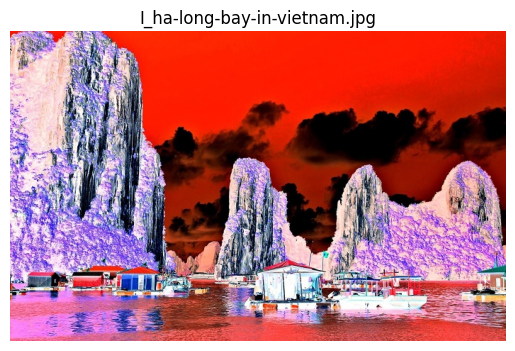

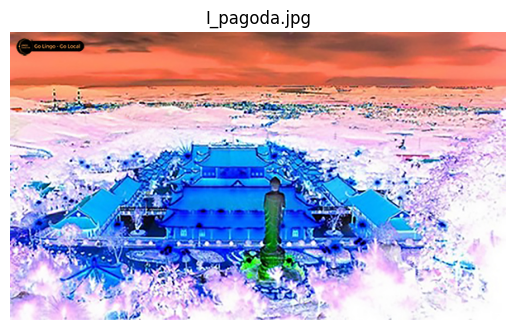

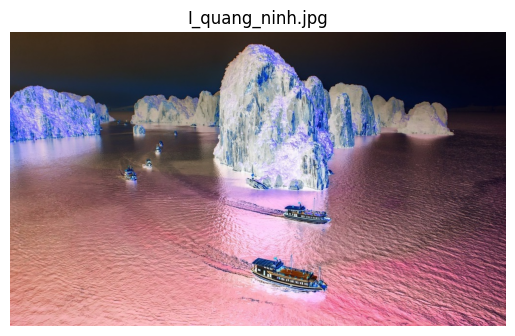

In [ ]:
#cau1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_dir = r'D:\nhapmonxulyanhso\XLA_lab2\exercise'
img_files = ['ha-long-bay-in-vietnam.jpg', 'pagoda.jpg', 'quang_ninh.jpg']
img_paths = [os.path.join(img_dir, f) for f in img_files]

def load_images():
    return [cv2.imread(path) for path in img_paths]

def show_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img = img / 255.0
    corrected = np.power(img, 1/gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img = np.float32(img) + 1
    log_img = np.log(img)
    log_img = log_img / np.max(log_img) * 255
    return np.uint8(log_img)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched = ((img - min_val) / (max_val - min_val)) * 255
    return np.uint8(stretched)

# Menu
functions = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

def apply_transform(option):
    images = load_images()
    for i, img in enumerate(images):
        transformed = functions[option](img)
        filename = f'{option}_{img_files[i]}'
        cv2.imwrite(os.path.join(img_dir, filename), transformed)
        show_image(filename, transformed)
apply_transform('I')  


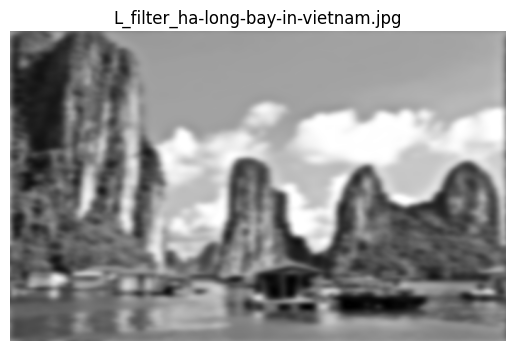

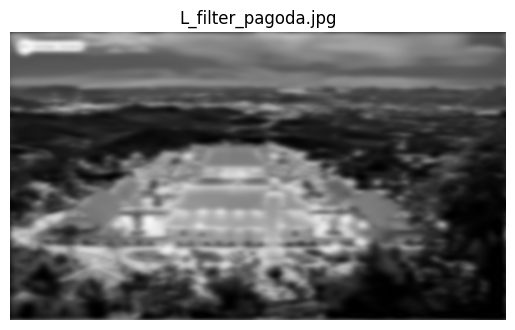

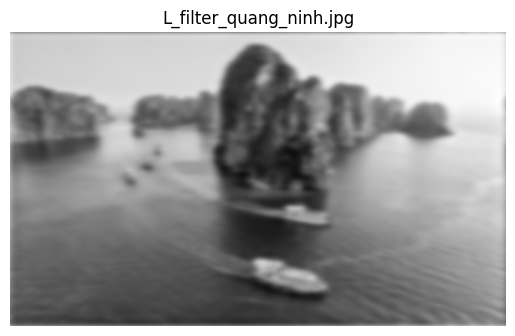

In [ ]:
#cau2
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter

def fft_image(img_gray):
    f = fft2(img_gray)
    return fftshift(f)

def ifft_image(f_shift):
    return np.abs(ifft2(ifftshift(f_shift)))

def butterworth_lowpass(shape, cutoff, order):
    P, Q = shape
    u = np.arange(0, P)
    v = np.arange(0, Q)
    U, V = np.meshgrid(u - P//2, v - Q//2)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff)**(2*order))
    return H.T

def butterworth_highpass(shape, cutoff, order):
    return 1 - butterworth_lowpass(shape, cutoff, order)

def apply_filter(img, filter_func, cutoff=30, order=2):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    F = fft_image(img_gray)
    H = filter_func(img_gray.shape, cutoff, order)
    G = F * H
    filtered = ifft_image(G)
    return np.uint8(np.clip(filtered, 0, 255))

# Menu
functions2 = {
    'F': lambda img: np.uint8(np.log(np.abs(fft_image(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))) + 1)),
    'L': lambda img: apply_filter(img, butterworth_lowpass),
    'H': lambda img: apply_filter(img, butterworth_highpass)
}

def apply_filter_menu(option):
    images = load_images()
    for i, img in enumerate(images):
        result = functions2[option](img)
        filename = f'{option}_filter_{img_files[i]}'
        cv2.imwrite(os.path.join(img_dir, filename), result)
        show_image(filename, result)

apply_filter_menu('L')  # Butterworth Lowpass Filter


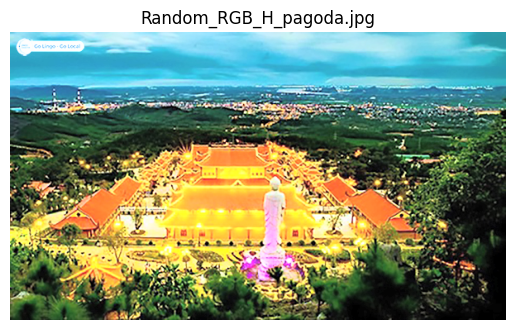

In [ ]:
#cau3
import random

def random_rgb_transform():
    option = random.choice(list(functions.keys()))
    idx = random.randint(0, len(img_files)-1)
    img = load_images()[idx]
    result = functions[option](img)
    filename = f'Random_RGB_{option}_{img_files[idx]}'
    cv2.imwrite(os.path.join(img_dir, filename), result)
    show_image(filename, result)


random_rgb_transform()


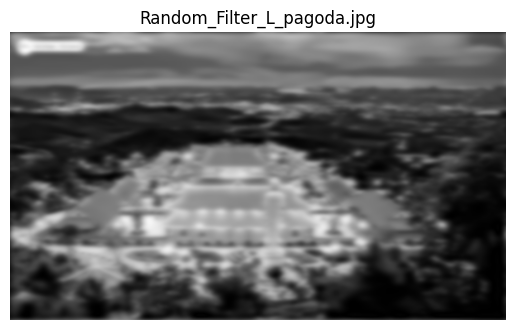

In [20]:
#cau4
def random_combined_transform():
    idx = random.randint(0, len(img_files)-1)
    img = load_images()[idx]
    option = random.choice(list(functions2.keys()))
    
    # Nếu là Butterworth L/H thì chọn thêm Min hoặc Max
    if option in ['L', 'H']:
        filter_img = functions2[option](img)
        min_img = np.minimum(filter_img, filter_img)
        max_img = np.maximum(filter_img, filter_img)
        final = random.choice([min_img, max_img])
    else:
        final = functions2[option](img)

    filename = f'Random_Filter_{option}_{img_files[idx]}'
    cv2.imwrite(os.path.join(img_dir, filename), final)
    show_image(filename, final)


random_combined_transform()
